In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as dt
import sklearn.cluster as cl

In [2]:
#IRIS dataset and K-Means Clustering:
IRIS = dt.load_iris()

In [3]:
x = IRIS.data
y = IRIS.target

In [4]:
KM = cl.KMeans(n_clusters = 3, random_state = 65)
KM.fit(x)

KMeans(n_clusters=3, random_state=65)

In [6]:
labels = KM.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [7]:
centroids = KM.cluster_centers_
centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0, 0.5, 'X4')

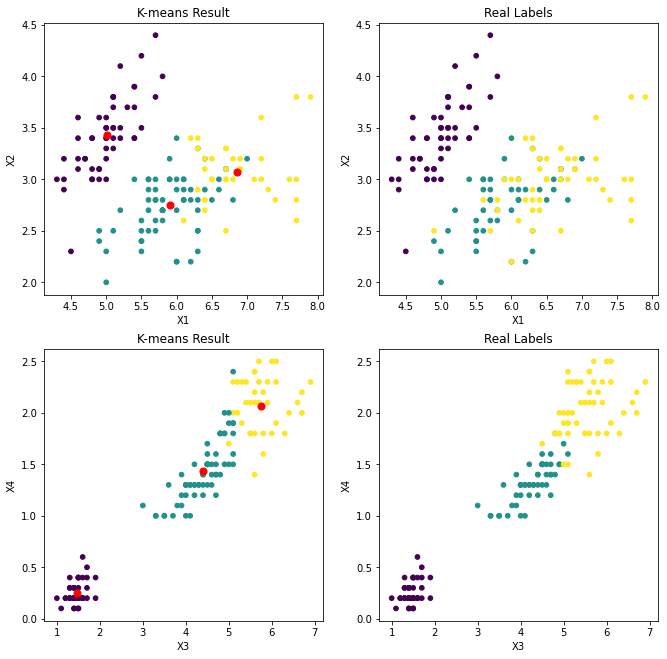

In [8]:
plt.figure(figsize = (11, 11))
plt.subplot(2, 2, 1)
plt.scatter(x[:, 0], x[:, 1], s = 22, c = labels)
plt.scatter(centroids[:, 0], centroids[:, 1], s = 50, c = "r", marker = "o")
plt.title("K-means Result")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(2, 2, 2)
plt.scatter(x[:, 0], x[:, 1], s = 22, c = y)
plt.title("Real Labels")
plt.xlabel("X1")
plt.ylabel("X2")

plt.subplot(2, 2, 3)
plt.scatter(x[:, 2], x[:, 3], s = 22, c = labels)
plt.scatter(centroids[:, 2], centroids[:, 3], s = 50, c = "r", marker = "o")
plt.title("K-means Result")
plt.xlabel("X3")
plt.ylabel("X4")

plt.subplot(2, 2, 4)
plt.scatter(x[:, 2], x[:, 3], s = 22, c = y)
plt.title("Real Labels")
plt.xlabel("X3")
plt.ylabel("X4")

In [10]:
#California Housing dataset and K-Means Clustering:
CH = dt.fetch_california_housing(as_frame = True)

In [13]:
CH.data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [14]:
CH.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [15]:
CH.frame.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [16]:
CH.frame.shape

(20640, 9)

In [17]:
#Spatial Features like "Latitude" and "Longitude" can be considered for Clustering with Medincome:
x2 = CH.frame.loc[:, ["MedInc", "Latitude", "Longitude"]]
x2.head()

MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25

In [18]:
KM_CH = cl.KMeans(n_clusters = 8, random_state = 35)

In [21]:
x2["cluster"] = KM_CH.fit_predict(x2)
x2["cluster"] = x2["cluster"].astype("category")
x2.head(10)

MedInc  Latitude  Longitude cluster
0  8.3252     37.88    -122.23       5
1  8.3014     37.86    -122.22       5
2  7.2574     37.85    -122.24       5
3  5.6431     37.85    -122.25       1
4  3.8462     37.85    -122.25       1
5  4.0368     37.85    -122.25       1
6  3.6591     37.84    -122.25       1
7  3.1200     37.84    -122.25       3
8  2.0804     37.84    -122.26       3
9  3.6912     37.84    -122.25       1

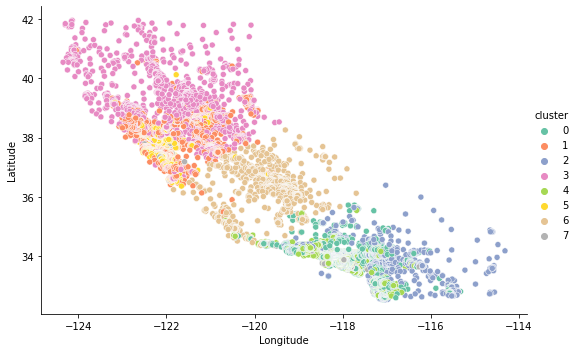

In [38]:
sns.relplot(x = "Longitude", y = "Latitude", hue = "cluster", data = x2, height = 5, aspect = 1.5, palette = ("Set2"))

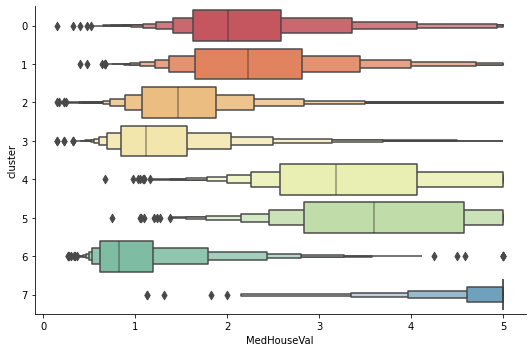

In [40]:
#Our Target = Median House Value:
x2["MedHouseVal"] = CH.frame["MedHouseVal"]
sns.catplot(x = "MedHouseVal", y = "cluster", data = x2 , kind = "boxen", height = 5, aspect = 1.5, palette = ("Spectral"))